In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [2]:
data = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#EDA

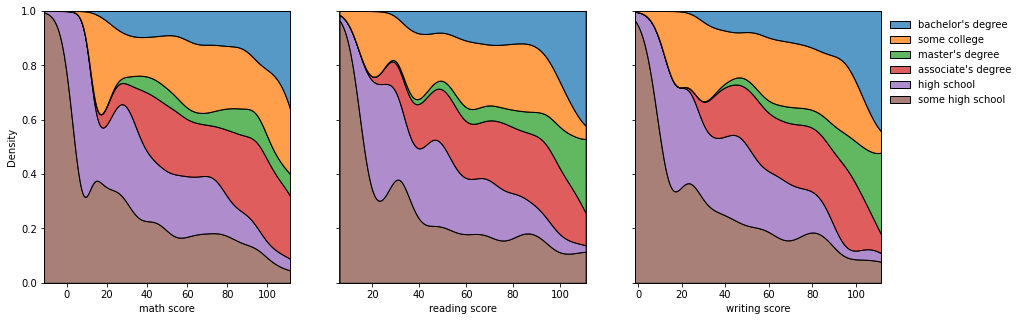

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (15,5), sharey = True)
# Math score
ax1 = sns.kdeplot(ax = axs[0], data=data, x="math score", hue="parental level of education", multiple="fill", legend = False)

# Reading score
ax2 = sns.kdeplot(ax = axs[1], data=data, x="reading score", hue="parental level of education", multiple="fill", legend = False)

# Writing
ax3 = sns.kdeplot(ax = axs[2], data=data, x="writing score", hue="parental level of education",multiple="fill")

sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False,)

##Pie chart

([<matplotlib.patches.Wedge at 0x7f8864a31990>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80'),
  Text(0.033911133252536786, -0.5990409293541875, '48.20')])

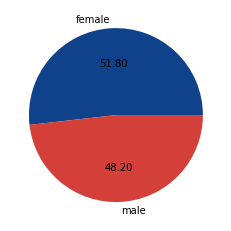

In [6]:
#Pie chart for gender & race & test preparation course & lunch
colors = ['#0F428A','#D53F3A','#009087','#FFF0E2',"#8B969C"]
plt.pie(data.gender.value_counts(), labels = data.gender.value_counts().index, colors = colors[:2], autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7f8864a01e90>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90')])

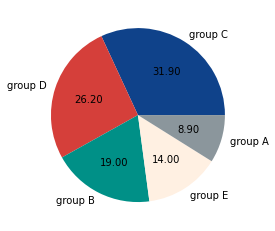

In [7]:
plt.pie(data['race/ethnicity'].value_counts(), labels = data['race/ethnicity'].value_counts().index, colors = colors, autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7f8864968d50>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.20'),
  Text(0.2588737113318806, -0.5412803354836181, '35.80')])

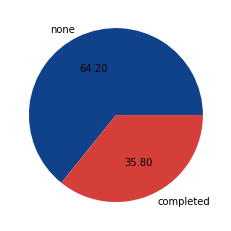

In [8]:
plt.pie(data['test preparation course'].value_counts(), labels = data['test preparation course'].value_counts().index, colors = colors, autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7f886493e990>,
 [Text(-0.48393302764960144, 0.9878303623344902, 'standard'),
  Text(0.48393293516224545, -0.9878304076435662, 'free/reduced')],
 [Text(-0.2639634696270553, 0.5388165612733582, '64.50'),
  Text(0.2639634191794066, -0.5388165859873997, '35.50')])

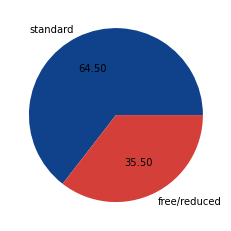

In [9]:
plt.pie(data.lunch.value_counts(), labels = data.lunch.value_counts().index, colors = colors, autopct='%.2f')

##Bar chart + Density plot

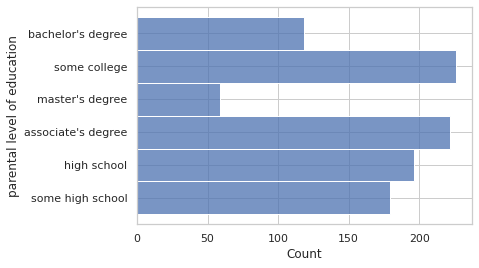

In [10]:
#Bar chart for parental level of edu
sns.set_theme(style="whitegrid")
sns.histplot(data= data, y= data['parental level of education'])

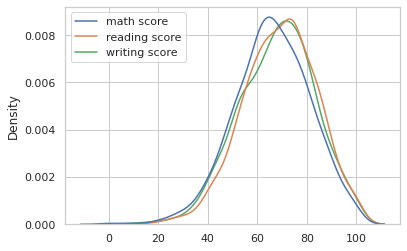

In [11]:
#Density plot for score with 3 different color
sns.set_theme(style="whitegrid")
sns.kdeplot(data=data[:2:-1])

#**Hypothesis Testing**
---
Conduct 2 hypothesis testing with the null hypothesises are:
1. Gender does not affect how student perform in math. $$H_0: \mu_{female}= \mu_{male}$$
2. Parental level of education does not affect how student perfome in math, reading, and writing.
$$H_0: \mu_{high school} = \mu_{bachelor} = \mu_{master}$$

##Hypothesis 1

In [12]:
#perform a Shapiro-Wilk test for checking the normality of input distribution
def check_normality(data):
  name = input('')
  pvalue = st.shapiro(data).pvalue
  print(pvalue)
  if pvalue < 0.05:
    print(name + ' is normally distributed')
  else:
    print(name + ' is not normally distributed')

In [13]:
math_fe = data['math score'][data.gender == 'female']
math_male = data['math score'][data.gender == 'male']

In [14]:
#check normality of female's math score & male's math score
check_normality(math_fe)
check_normality(math_male)

Fe
0.0035164919681847095
Fe is normally distributed
Ma
0.03796108067035675
Ma is normally distributed


In [15]:
#perform a Levene test for checking the equality of variances of input distribution
def check_equality_variances(data1, data2):
  name = input('')
  pvalue = st.levene(data1,data2).pvalue
  print(pvalue)
  if pvalue < 0.05:
    print(name + " have different variances")
  else:
    print(name + ' have identical variances')

In [16]:
#Check equality variances of female's math score and male's math score
check_equality_variances(math_fe,math_male) 

VS
0.55630915751998
VS have identical variances


Since these two data above are continuos, unpaired, normally distributed, and have identical variances, we will use t-test to check the hypothesis

In [17]:
#perform t-test for checking the hypothesis
t_statistic, hypo1_pvalue = st.ttest_ind(math_fe, math_male)
print(hypo1_pvalue)
if hypo1_pvalue < 0.05:
  print("Reject the null hypothesis: Mean of female's math score and male's math score are different")
else:
  print("Fail to reject the null hypothesis: Mean of female's math score and male's math score are not different")

9.120185549328822e-08
Reject the null hypothesis: Mean of female's math score and male's math score are different


Text(0.5, 1.0, "Student's t distribution for the math mean scores between male and female students")

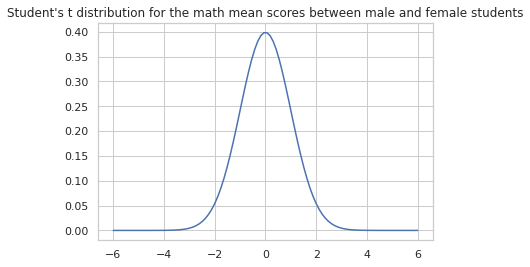

In [29]:
#plot the t's distribution
df = len(math_fe) + len(math_male) - 2
x = np.linspace(-6, 6, 100)
plt.plot(x, st.t.pdf(x,df))

#Shading p-value
fill_range1 = np.arange(-6,t_statistic,200)
fill_range2 = np.arange(-t_statistic,6,200)
plt.fill_between(fill_range1,st.t.pdf(fill_range1,df),color='r')
plt.fill_between(fill_range2,st.t.pdf(fill_range2,df),color='r')
plt.title("Student's t distribution for the math mean scores between male and female students")

##Hypothesis 2

In [19]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
highschool_math = data['math score'][(data['parental level of education']=='high school') |  
                                     (data['parental level of education']=='some high school')]
bachelor_math = data['math score'][(data['parental level of education']=="bachelor's degree") |
                                   (data['parental level of education']=='some college') | 
                                   (data['parental level of education']=="associate's degree")]
master_math = data['math score'][(data['parental level of education']=="master's degree")]

In [21]:
#perform a Levene test for checking the equality of variances of input distribution
def check_equality_variances(data1, data2, data3):
  name = input('')
  pvalue = st.levene(data1,data2,data3).pvalue
  print(pvalue)
  if pvalue < 0.05:
    print(name + " have different variances")
  else:
    print(name + ' have identical variances')

In [22]:
#Check normality of math score of children have parental level of education respectively are 
#equivalent highschool, equivalen bachelor, and master's degre.
check_normality(highschool_math)
check_normality(bachelor_math)
check_normality(master_math)

H
0.0003683545801322907
H is normally distributed
B
0.046108219772577286
B is normally distributed
M
0.03172202408313751
M is normally distributed


In [23]:
#Check equality of variances of math score of children have parental level of education respectively are 
#equivalent highschool, equivalen bachelor, and master's degre.
check_equality_variances(highschool_math, bachelor_math, master_math)

H
0.6973737643310212
H have identical variances


Since these three data above are continuos, unpaired, normally distributed, and have identical variances, we will use ANOVA test to check the hypothesis

In [24]:
#perform ANOVA test for checking the hypothesis
hypo2_pvalue = st.f_oneway(highschool_math,bachelor_math,master_math).pvalue
print(hypo2_pvalue)
if hypo2_pvalue < 0.05:
  print("Reject the null hypothesis: There's a difference between those distribution")
else:
  print("Fail to reject null hypothesis: There's no difference between those distribution")

3.677547170234293e-07
Reject the null hypothesis: There's a difference between those distribution


As we know that there's a difference between those distribution, now we'll elaborate more on this difference by performing a Tukey's test

In [25]:
highschool_math.rename(lambda x: "highschool", inplace=True)
bachelor_math.rename(lambda x: "bachelor", inplace=True)
master_math.rename(lambda x: "master", inplace=True)

In [26]:
score = pd.concat([highschool_math,bachelor_math,master_math])

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=score,
                          groups=score.index,
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  bachelor highschool  -5.1091  0.001 -7.4463 -2.7719   True
  bachelor     master     1.85 0.6264 -2.9521  6.6522  False
highschool     master   6.9591 0.0027  2.0429 11.8753   True
------------------------------------------------------------


Through the values, we can say that there's a differences between mean math'score of children who have parental level of education is equivalent to highschool and who have parental level of education is higher than undergraduate